<font color="#CA3532"><h1 align="left"> Predicción de la gravedad en accidentes de tráfico
</h1></font>
<font color="#6E6E6E"><h3 align="right">UK 2005-2015</h3></font> 

El ejercicio se compone de tres CSV:

- Accidents0515
- Casualties0515
- Vehicles0515

La recogida de datos está comprendida entre los años 2005 a 2015, el planteamiento del problema es la predicción de la gravedad del accidente. La variable target que recoge los gravedad del accidente es Accident Severity (ML Supervisado).
Los paso a seguir para hacer el tratamiento y posterior modelado van a ser:

- Importación de librerias
- Importación de csv y limpieza del dato
- Identificación de missings y procesado
- Visualización y exploración de las variables
- Transformación de variables
- Proceso de modelado

## Importación de librerías

In [1]:

#limpieza, visulización y poner en la misma escala los datos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

from sklearn.preprocessing import scale # estandarización
%matplotlib inline

#no salten los warnings
import warnings
warnings.filterwarnings('ignore')

#librerías para mapas
from shapely.geometry import Point, Polygon
import geopandas as gpd

In [2]:
#from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

In [3]:
# quito la limitación para ver todsas las columnas o filas
pd.set_option ("display.max_rows", None)
pd.set_option ("display.max_columns", None)

## Importación de csv y limpieza del dato

In [4]:
df_accidents= pd.read_csv("./Accidents0515.csv",index_col='Accident_Index')

In [5]:
df_accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863


In [6]:

print("Numero del variables/predictores", df_accidents.shape[1]-1)
print ("numero de filas/registros",df_accidents.shape[0])

Numero del variables/predictores 30
numero de filas/registros 1780653


In [7]:
#quiero ver que variables hay y que categorías hay dentro de las variables
for var in df_accidents.describe(include='all'):
    print('Categorías de', var, ':',df_accidents[var].unique())
    print('')

Categorías de Location_Easting_OSGR : [525680. 524170. 524520. ... 319301. 320671. 311731.]

Categorías de Location_Northing_OSGR : [178240. 181650. 182240. ... 570791. 569791. 570137.]

Categorías de Longitude : [-0.19117  -0.211708 -0.206458 ... -3.387067 -3.123385 -3.348646]

Categorías de Latitude : [51.489096 51.520075 51.525301 ... 55.163502 55.02058  55.103676]

Categorías de Police_Force : [ 1 48  3  4  5  6  7 10 11 12 13 14 16 17 20 21 22 23 30 31 32 33 34 35
 36 37 40 41 42 43 44 45 46 47 50 52 53 54 55 60 61 62 63 91 92 93 94 95
 96 97 98]

Categorías de Accident_Severity : [2 3 1]

Categorías de Number_of_Vehicles : [ 1  2  4  3  5  6  8  7 13 10 11 18  9 20 17 15 12 14 22 16 28 32 19 29
 34 67 21 37]

Categorías de Number_of_Casualties : [ 1  2  5  4  3  8  7  6 10  9 23 17 13 11 19 15 16 12 14 18 20 29 21 35
 22 26 45 41 36 40 25 28 42 68 27 32 62 47 48 24 43 87 63 51 33 38 46 70
 93 54 34]

Categorías de Date : ['04/01/2005' '05/01/2005' '06/01/2005' ... '26/12/2015' '0

In [8]:
#voy a ir mirando si contiene algún missing

df_accidents.isnull().sum().sort_values(ascending = False)

LSOA_of_Accident_Location                      129471
Time                                              151
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Location_Easting_OSGR                             138
Weather_Conditions                                  0
Local_Authority_(District)                          0
Urban_or_Rural_Area                                 0
Carriageway_Hazards                                 0
Special_Conditions_at_Site                          0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Road_Surface_Conditions                             0
Local_Authority_(Highway)   

De partida el propio dataset tiene dos tipos de missings -1 y Nan, según lo que voy observando

In [9]:
#casualties=pd.read_csv("./Casualties0515.csv", sep=';',sep=';') no funciona para la lectura

df_casualties=pd.read_csv("./Casualties0515.csv", error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)


In [10]:
df_casualties.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [11]:

print("Numero del variables/predictores", df_casualties.shape[1]-1)
print ("numero de filas/registros",df_casualties.shape[0])

Numero del variables/predictores 13
numero de filas/registros 2216720


In [12]:
#quiero ver que variables que hay y que categorías hay dentro de las variables
for var in df_casualties.describe(include='all'):
    print('Categorías de', var, ':',df_casualties[var].unique())
    print('')

Categorías de Vehicle_Reference : [ 1  2  3  4  5  7  6  8  9 12 14 13 15 17 18 10 19 11 20 21 22 23 24 25
 26 27 28 16 30 29 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 91]

Categorías de Casualty_Reference : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  85  86  87  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84 852 203 140
 149  88  89  90  91  92  93]

Categorías de Casualty_Class : [3 2 1]

Categorías de Sex_of_Casualty : [ 1  2 -1]

Categorías de Age_of_Casualty : [ 37  62  30  49  31  13  35  48  26   9  40  38  28  23  20  75  34  42
  56  54  33  -1  25  59  68  47  29  39  24  43  50  45  65  74  19  22
  52  86  36  14  41   6  58  21  61  27  46  32  44  53  78  57  6

In [13]:
#voy a ir mirando si contiene algún missing

df_casualties.isnull().sum().sort_values(ascending = False)

Casualty_Home_Area_Type               0
Casualty_Type                         0
Pedestrian_Road_Maintenance_Worker    0
Bus_or_Coach_Passenger                0
Car_Passenger                         0
Pedestrian_Movement                   0
Pedestrian_Location                   0
Casualty_Severity                     0
Age_Band_of_Casualty                  0
Age_of_Casualty                       0
Sex_of_Casualty                       0
Casualty_Class                        0
Casualty_Reference                    0
Vehicle_Reference                     0
dtype: int64

Este CSV contiene missing del tipo -1, pero las variables son predictoras del daño, con lo que voy a desechar este dataset para introducir al modelo. Se puede utilizar para hacer visualizaciones para tener un conocimiento de las características de los daños o de la localización.

In [14]:
df_veh= pd.read_csv("./Vehicles0515.csv",error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [15]:
df_veh.head()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,1,9,0,18,0,0,0,0,0,0,1,1,15,2,74,10,-1,-1,-1,7,1
200501BS00002,1,11,0,4,0,3,0,0,0,0,4,1,1,1,42,7,8268,2,3,-1,-1
200501BS00003,1,11,0,17,0,0,0,4,0,0,4,1,1,1,35,6,8300,2,5,2,1
200501BS00003,2,9,0,2,0,0,0,0,0,0,3,1,15,1,62,9,1762,1,6,1,1
200501BS00004,1,9,0,18,0,0,0,0,0,0,1,1,15,2,49,8,1769,1,4,2,1


In [16]:
print("Numero del variables/predictores", df_veh.shape[1]-1)
print ("numero de filas/registros",df_veh.shape[0])

Numero del variables/predictores 20
numero de filas/registros 3004425


In [17]:
#quiero ver que variables que hay y que categorías hay dentro de las variables
for var in df_veh.describe(include='all'):
    print('Categorías de', var, ':',df_veh[var].unique())
    print('')

Categorías de Vehicle_Reference : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 51 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 91]

Categorías de Vehicle_Type : [ 9 11  3 90  5  1 19  4  8 21 20  2 10 17 18 16 -1 97 22 98 23]

Categorías de Towing_and_Articulation : [ 0  1  5  4  2  3 -1]

Categorías de Vehicle_Manoeuvre : [18  4 17  2  5  9  7 13  6  3 16 11 15 12 14 10  1  8 -1]

Categorías de Vehicle_Location-Restricted_Lane : [ 0  4  2  8  9  6  3  7  5  1 -1]

Categorías de Junction_Location : [ 0  3  1  8  2  6  5  7  4 -1]

Categorías de Skidding_and_Overturning : [ 0  1  2  5  3  4 -1]

Categorías de Hit_Object_in_Carriageway : [ 0  4 10  7  8 11  9  2  1  6  5 -1 12]

Categorías de Vehicle_Leaving_Carriageway : [ 0  1  7  3  4  6  2  5  8 -1]

Categorías de Hit_Object_off_Carriageway : [ 0  1 10  2  4  7  9  6  5  8  3 -1 11]

Categorías de 1st_Point_of_Impact : [ 1  

In [18]:
#voy a ir mirando si contiene algún missing, no contine ningún mi

df_veh.isnull().sum().sort_values(ascending = False)

Driver_Home_Area_Type               0
Hit_Object_off_Carriageway          0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
1st_Point_of_Impact                 0
Driver_IMD_Decile                   0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Vehicle_Reference                   0
dtype: int64

Este CSV contiene missing del tipo -1.

Unión de datasets seleccionados, Accidents0515 y Vehicles0515. La unión es outer con lo que se va a dar el caso que no haya datos de uno en el otro dataset o viceversa, con lo que se generaran mas valores missings de los que ya partimos.

In [19]:
#uno los dos datasets por el indice
accidents_total= df_accidents.join(df_veh, how='outer')

In [20]:
#echo un vistazo a mi nuevo dataset
accidents_total.shape

(3144481, 52)

In [21]:
accidents_total.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849,1.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909,1.0,11.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857,1.0,11.0,0.0,17.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857,2.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840,1.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0


## Identificación de missings y procesado

Como he comentado anteriormente, nos encontramos con dos tipos de valores para missings -1 y Nan. También como hemos observado se han generador mas missings debido a que hay datos que están en un dataset y en el otro no.

In [22]:
#estudio el porcentaje de missings que hay sobre el total de las observaciones
total = accidents_total.isnull().sum().sort_values(ascending = False)
percent = (accidents_total.isnull().sum() / accidents_total.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(50)

,Total,Percent
LSOA_of_Accident_Location,213695,6.795875
Driver_Home_Area_Type,140056,4.454026
Vehicle_Leaving_Carriageway,140056,4.454026
Vehicle_Reference,140056,4.454026
Vehicle_Type,140056,4.454026
Towing_and_Articulation,140056,4.454026
Vehicle_Manoeuvre,140056,4.454026
Vehicle_Location-Restricted_Lane,140056,4.454026
Junction_Location,140056,4.454026
Skidding_and_Overturning,140056,4.454026


Al tratar de un dataset con bastante abundancia de datos voy a construir un nuevo dataset con valores distintos de -1, otra opción que se puede dar es hacer un estudio de cada variable que contiene la categoría menos -1 e imputar la media, o mediana. Pero en este caso voy a no seleccionarlos.
También voy a eliminar identificadores y variables similares.

También voy a eliminar identificadores y variables similares entre sí.

In [23]:
accidents_total.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)

In [24]:
accidents_total.shape

(3144481, 47)

A continuación voy a construir el dataset con obrservaciones que no contenga el -1, al ser un databaset con un número importante 

In [25]:
# Selecciono variables que no contengan -1

for col in accidents_total.columns:
    accidents_total = (accidents_total[accidents_total[col]!=-1])

In [26]:
accidents_total.shape

(1673770, 47)

Voy a eliminar ahora los Nan, el % es muy pequeño por lo que no sería relevane la eliminación de esas observaciones

In [27]:
#vamos a eliminar las observaciones que no se encuentran en uno de los dos datasets.
accidents_total = accidents_total.dropna(axis=0)

In [28]:
accidents_total.shape

(1534792, 47)

Voy a cambiar el formato a tipo fecha y crear el campo Date_time

In [29]:
#Creo la columna
accidents_total['Date_time'] =  accidents_total['Date'] +' '+ accidents_total['Time']

In [30]:
#cambio el type
accidents_total['Date_time'] = pd.to_datetime(accidents_total.Date_time)

In [31]:
df_clean_miss=accidents_total.copy()

In [32]:
#elimino los campos repetidos

df_clean_miss.drop(['Date','Time'],axis =1 , inplace=True)

In [33]:
df_clean_miss.shape

(1534792, 46)

In [34]:
df_clean_miss.isnull().sum().sort_values(ascending = False)

Date_time                                      0
Road_Type                                      0
Special_Conditions_at_Site                     0
Road_Surface_Conditions                        0
Weather_Conditions                             0
Light_Conditions                               0
Pedestrian_Crossing-Physical_Facilities        0
Pedestrian_Crossing-Human_Control              0
2nd_Road_Number                                0
Junction_Detail                                0
Speed_limit                                    0
1st_Road_Number                                0
Driver_Home_Area_Type                          0
1st_Road_Class                                 0
Local_Authority_(Highway)                      0
Local_Authority_(District)                     0
Day_of_Week                                    0
Number_of_Casualties                           0
Number_of_Vehicles                             0
Accident_Severity                              0
Police_Force        

In [35]:
#compruebo si no hay -1 y nan
for var in df_clean_miss.describe(include='all'):
    print('Categorías de', var, ':',df_clean_miss[var].unique())
    print('')

Categorías de Longitude : [-0.206458 -0.173862 -0.203238 ... -3.417278 -3.230255 -3.191397]

Categorías de Latitude : [51.525301 51.482442 51.51554  ... 55.264773 55.054855 54.990446]

Categorías de Police_Force : [ 1 48  3  4  5  6  7 10 11 12 13 14 16 17 20 21 22 23 30 31 32 33 34 35
 36 37 40 41 42 43 44 45 46 47 50 52 53 54 60 61 62 63 91 92 93 94 95 96
 97 98 55]

Categorías de Accident_Severity : [3 2 1]

Categorías de Number_of_Vehicles : [ 2  1  4  3  5  6  8  7 10 11 18  9 20 15 12 14 22 16 13 28 32 19 29 67
 21]

Categorías de Number_of_Casualties : [ 1  2  5  4  3  6  7 10  9  8 23 17 11 19 16 12 15 14 13 18 20 22 26 40
 25 28 42 29 27 32 45 21 48 24 36 87 63 51 33 46 70 41 93 54]

Categorías de Day_of_Week : [5 6 3 7 1 2 4]

Categorías de Local_Authority_(District) : [ 12  11   1 570   8   2   9  28   3   4  31  30  24  27   5  13  17  26
  57  25  32  14  16  15  20  10   7  19   6  18  29  23  21  22  64  62
  65  60  63  61  74  71  85  76  73  84  83  79  70  75  80  72

Categorías de Driver_Home_Area_Type : [1. 2. 3.]

Categorías de Date_time : ['2005-06-01T00:15:00.000000000' '2005-07-01T10:35:00.000000000'
 '2005-11-01T12:40:00.000000000' ... '2014-07-12T22:20:00.000000000'
 '2014-11-12T06:40:00.000000000' '2014-12-17T06:55:00.000000000']



## Visualización y exploración de las variables

In [36]:
df_clean_miss.describe()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
count,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06,1.534792e+06
mean,-1.175658e+00,5.238988e+01,2.521360e+01,2.849516e+00,2.112106e+00,1.490370e+00,4.121934e+00,3.015008e+02,3.946855e+00,1.014330e+03,5.087927e+00,4.009529e+01,2.373161e+00,4.166293e+02,6.463417e-03,7.070137e-01,1.904247e+00,1.534747e+00,1.370042e+00,1.129039e-01,6.474102e-02,1.376466e+00,1.138261e+00,1.524373e+00,9.447699e+00,2.226230e-02,1.253792e+01,7.836567e-02,2.606638e+00,2.322236e-01,3.298147e-01,4.289637e-01,6.515222e-01,1.806625e+00,1.000626e+00,8.664143e+00,1.340933e+00,3.922605e+01,6.765433e+00,1.891303e+03,1.337320e+00,7.269527e+00,5.375203e+00,1.313308e+00
std,1.180607e+00,1.147235e+00,1.825443e+01,3.928283e-01,9.463601e-01,1.041395e+00,1.921812e+00,1.979898e+02,1.425606e+00,1.806509e+03,1.669201e+00,1.463479e+01,2.524007e+00,1.354675e+03,1.045610e-01,1.800336e+00,1.611759e+00,1.554363e+00,6.199522e-01,7.329499e-01,5.762263e-01,4.845154e-01,3.480406e-01,7.521559e-01,4.830577e+00,2.533563e-01,6.142332e+00,7.552193e-01,3.182504e+00,7.277164e-01,1.678502e+00,1.481381e+00,2.219300e+00,1.131262e+00,2.501503e-02,5.885821e+00,4.766288e-01,1.594051e+01,1.744413e+00,1.676049e+03,6.026067e-01,4.511278e+00,2.841077e+00,6.614502e-01
min,-7.375909e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,-2.038506e+00,5.146540e+01,7.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,1.200000e+02,3.000000e+00,2.000000e+00,3.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.600000e+01,6.000000e+00,1.296000e+03,1.000000e+00,4.000000e+00,3.000000e+00,1.000000e+00
50%,-1.242512e+00,5.225992e+01,2.200000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.000000e+02,3.000000e+00,1.530000e+02,6.000000e+00,3.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+

In [37]:
df_clean_miss.describe(include='object')

,Local_Authority_(Highway)
count,1534792
unique,207
top,E10000030
freq,47600


In [38]:
df_clean_miss.dtypes

Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Day_of_Week                                             int64
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Type                                               int64
Speed_limit                                             int64
Junction_Detail                                         int64
2nd_Road_Number                                         int64
Pedestrian_Crossing-Human_Control                       int64
Pedestri

Voy a pintar la correlación de las variables para ver las variables que tienen mayor colinealidad entre ellas y con la variable target. En caso de que haya mucha colinealidad  entre ellas hay que ver si la relación es, por qué son iguales y explican lo mismo o por que la relación es causal.

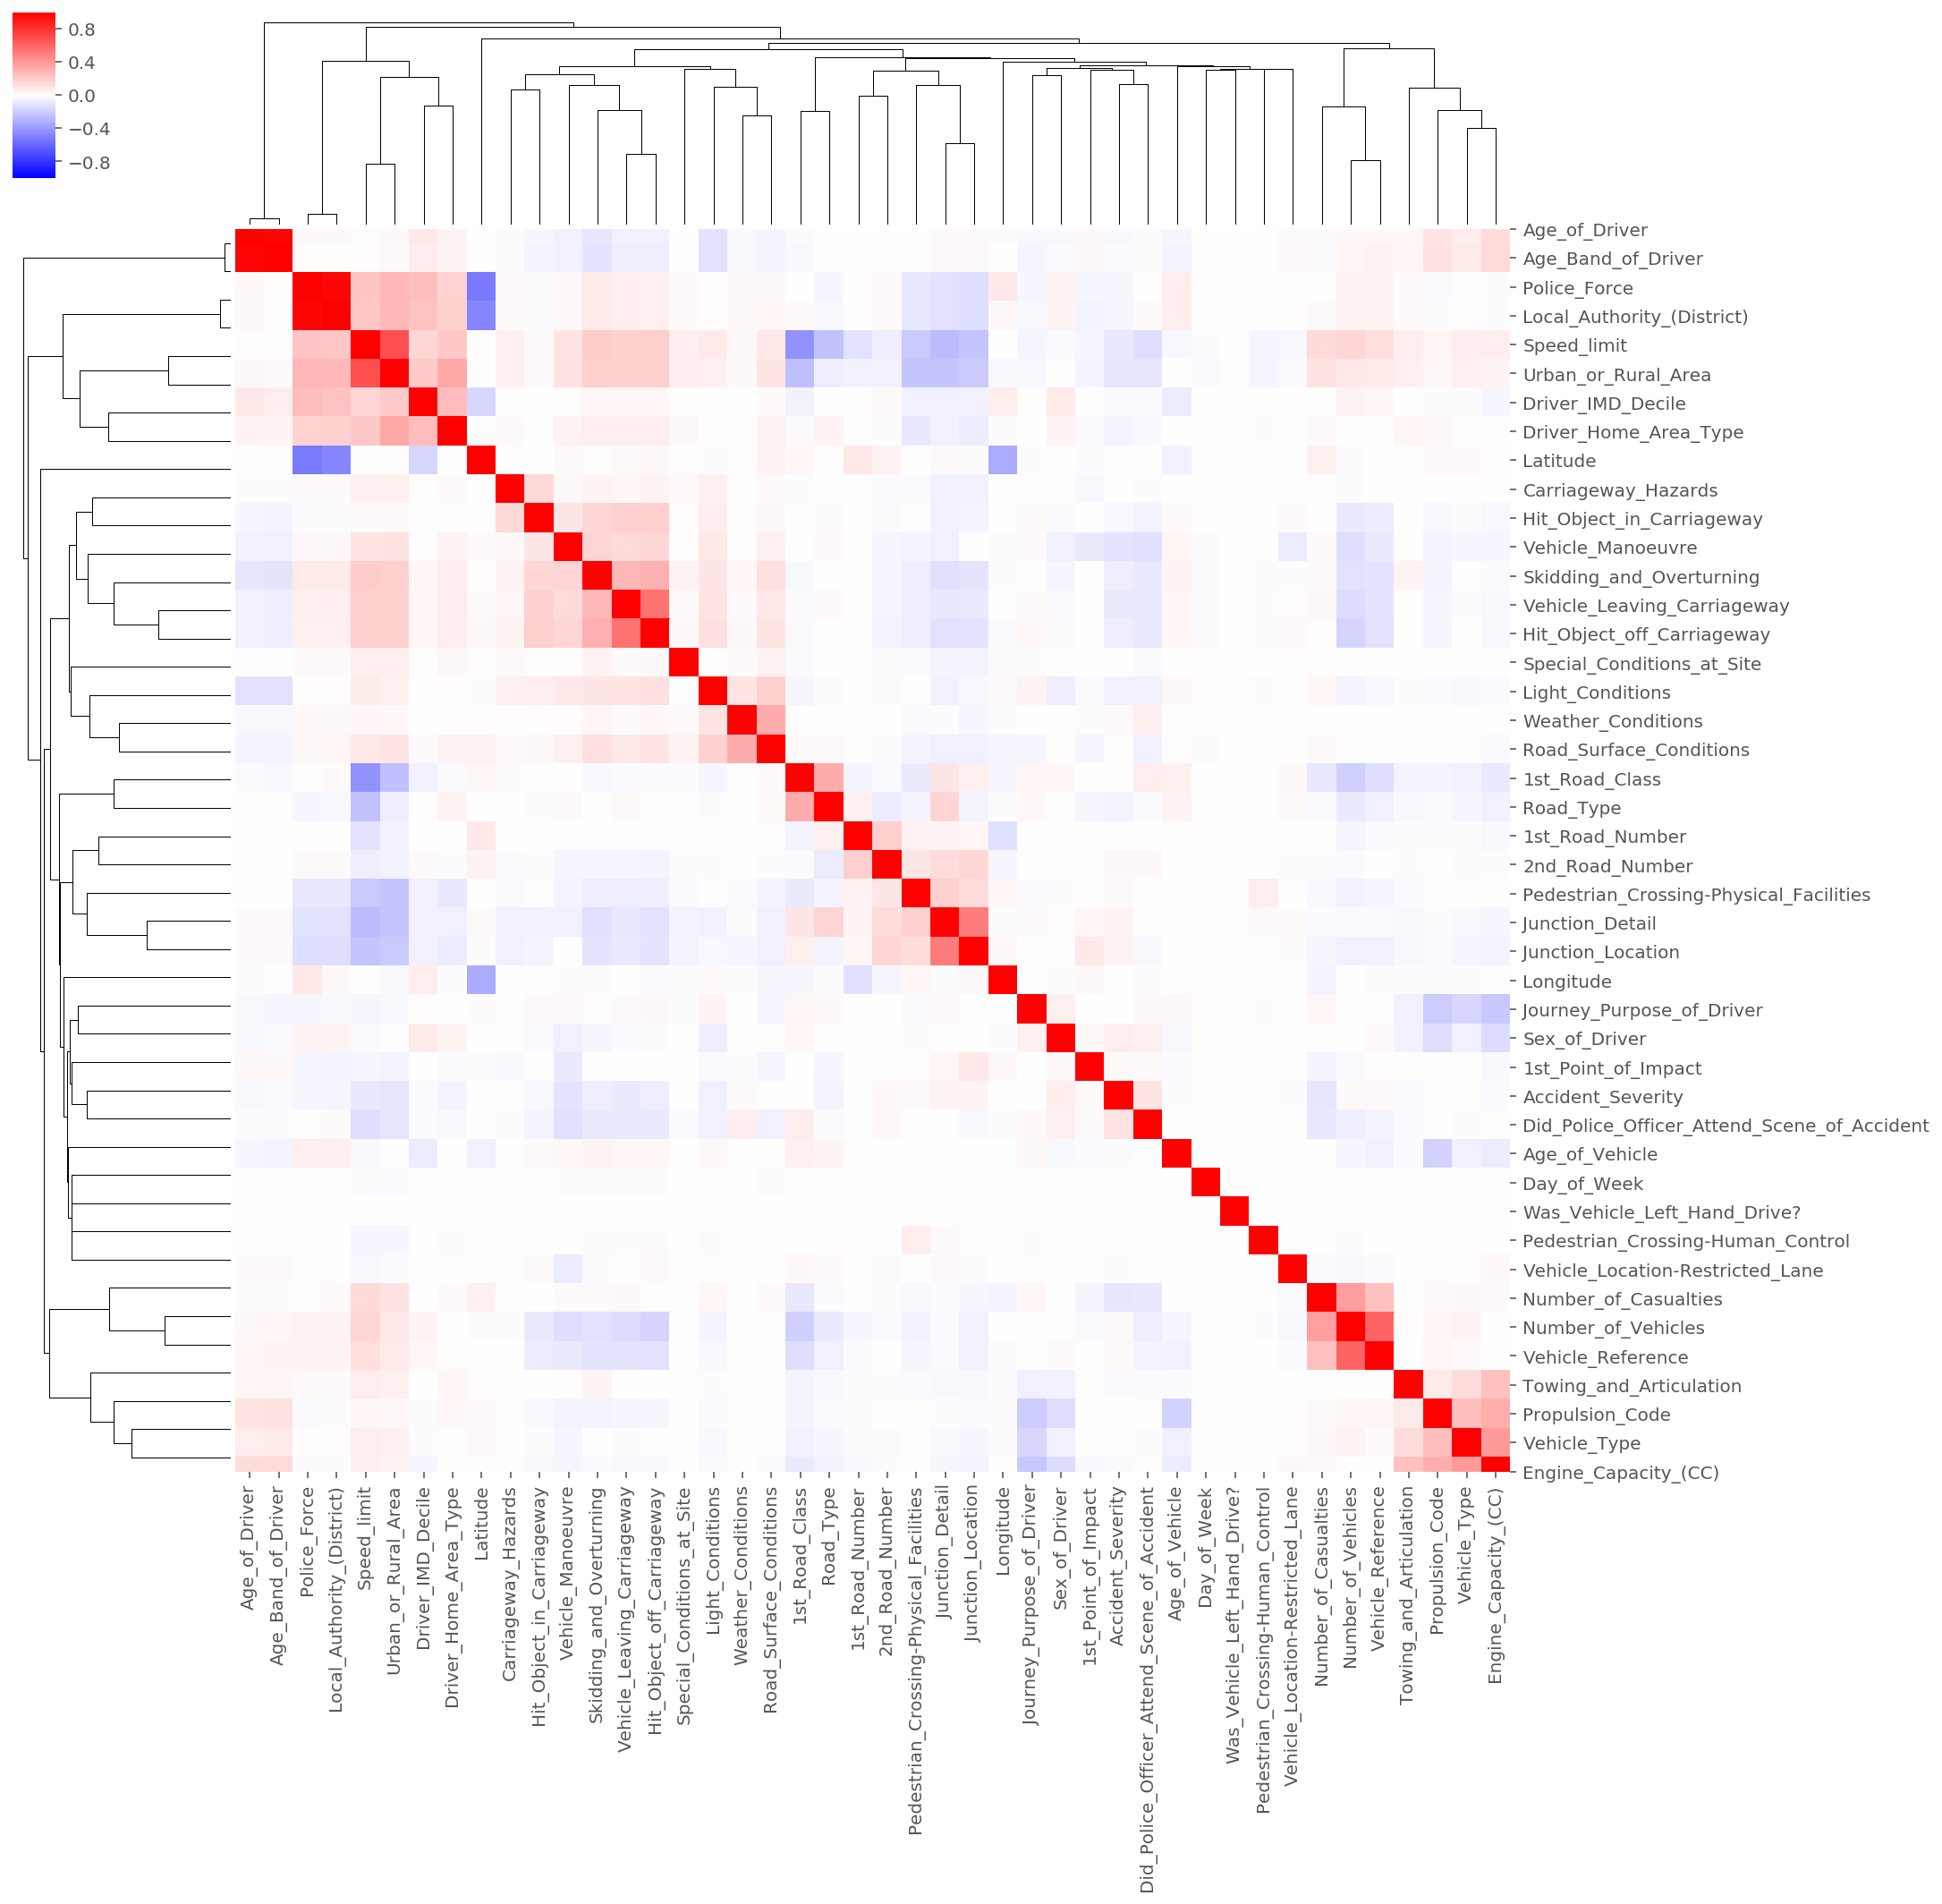

In [39]:

correlation_matrix = df_clean_miss.corr()

cor = sns.clustermap(data=correlation_matrix, cmap='bwr',vmin=-1,vmax=1,figsize=(15,15))


Correlación alta entre Local_Authority_(District) y Police_Force, y entre speed limit y Urban_or_Rural_Area tambien.

In [40]:
#Miro las variables que tienen una mayor correlación con la target
correlation_matrix["Accident_Severity"].abs().sort_values()[::-1]

Accident_Severity                              1.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.106559
Vehicle_Manoeuvre                              0.104905
Number_of_Casualties                           0.100031
Urban_or_Rural_Area                            0.095898
Speed_limit                                    0.090238
Vehicle_Leaving_Carriageway                    0.079862
Sex_of_Driver                                  0.071131
Skidding_and_Overturning                       0.067903
Hit_Object_off_Carriageway                     0.064832
Light_Conditions                               0.062431
Junction_Detail                                0.047989
Driver_Home_Area_Type                          0.046302
Road_Type                                      0.044383
Junction_Location                              0.040052
Local_Authority_(District)                     0.036255
Police_Force                                   0.034776
Hit_Object_in_Carriageway                      0

In [41]:
#voy probando cada variable que he visto en la matriz de correlación que estaba pintada mas fuerte para ver que variables tienen mas correlación
correlation_matrix["Speed_limit"].abs().sort_values()[::-1]

Speed_limit                                    1.000000
Urban_or_Rural_Area                            0.687034
1st_Road_Class                                 0.424513
Junction_Detail                                0.262993
Road_Type                                      0.240602
Police_Force                                   0.234235
Junction_Location                              0.232394
Local_Authority_(District)                     0.226028
Driver_Home_Area_Type                          0.211419
Pedestrian_Crossing-Physical_Facilities        0.204556
Skidding_and_Overturning                       0.202040
Hit_Object_off_Carriageway                     0.194156
Vehicle_Leaving_Carriageway                    0.181912
Driver_IMD_Decile                              0.164018
Number_of_Vehicles                             0.162237
Number_of_Casualties                           0.142562
Vehicle_Reference                              0.127347
Did_Police_Officer_Attend_Scene_of_Accident    0

A continuación voy a ver como se comportan las variables que estimo serán las que mas peso tengan en el modelo

Text(0.5, 0, '1 - domingo  ,2 - lunes , 3 - martes , 4 - miércoles , 5 - jueves , 6 - viernes, 7 - sabado')

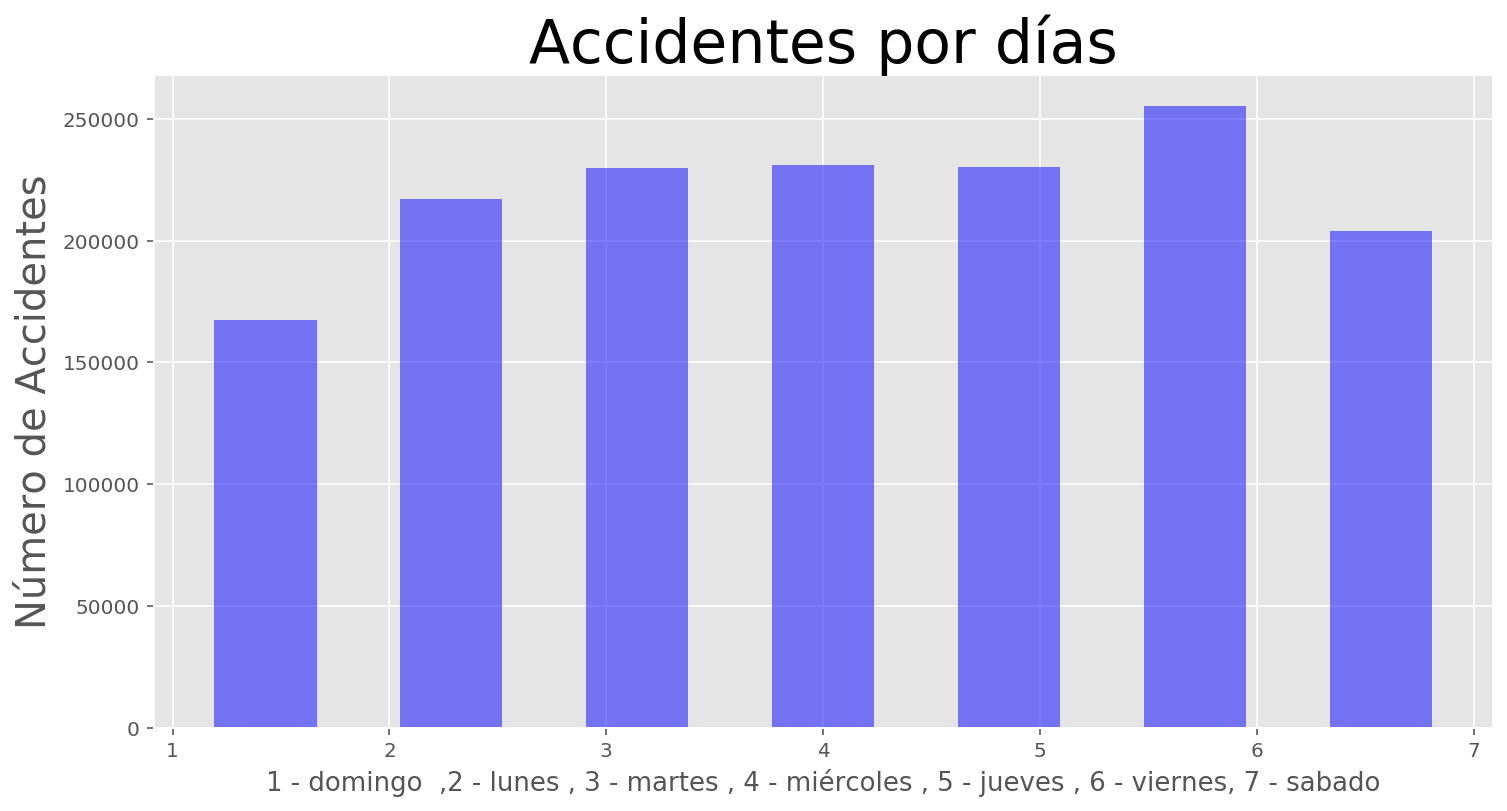

In [42]:
plt.figure(figsize=(12,6))
df_clean_miss.Day_of_Week.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'blue')
plt.title('Accidentes por días' , fontsize= 30)

plt.ylabel('Número de Accidentes' , fontsize = 20)
plt.xlabel('1 - domingo  ,2 - lunes , 3 - martes , 4 - miércoles , 5 - jueves , 6 - viernes, 7 - sabado',  fontsize = 13)

Se ve una clara tendencia desde el lunes hasta el viernes que es el pico de la semana, luego baja sábado y más el domingo.

Text(0.5, 0, '30 - 48 km/h,   60 - 96 km/h,  70 - 112 km/h ')

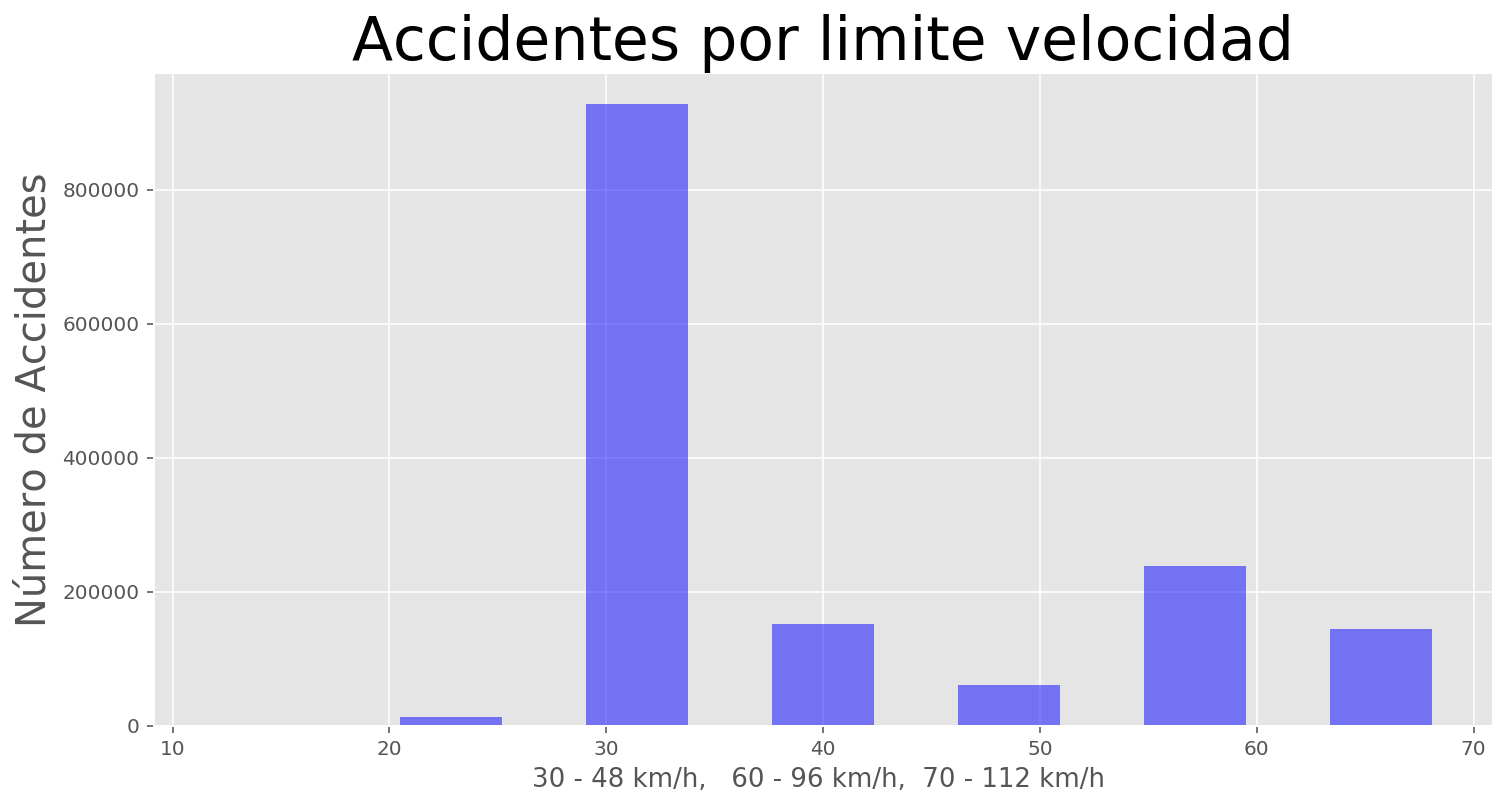

In [43]:
plt.figure(figsize=(12,6))
df_clean_miss.Speed_limit.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'blue')
plt.title('Accidentes por limite velocidad' , fontsize= 30)

plt.ylabel('Número de Accidentes' , fontsize = 20)
plt.xlabel( '30 - 48 km/h,   60 - 96 km/h,  70 - 112 km/h ', fontsize = 13)

Los límites de velocidad en Inglaterra varían, según:

- en ciudad 30 millas/h (48 km/h)
- en carretera 60 millas/h (96 km/h)
- en autopista 70 millas/h (112 km/h)

De la visualización se puede observar que el mayor número de accidentes se da en cuidad a menos de 50 km/h, para ver si tienen consistencia lo que expongo voy a visualizar por zona.



Text(0.5, 0, '1-Urban, 2- Rural, 3- sin localización')

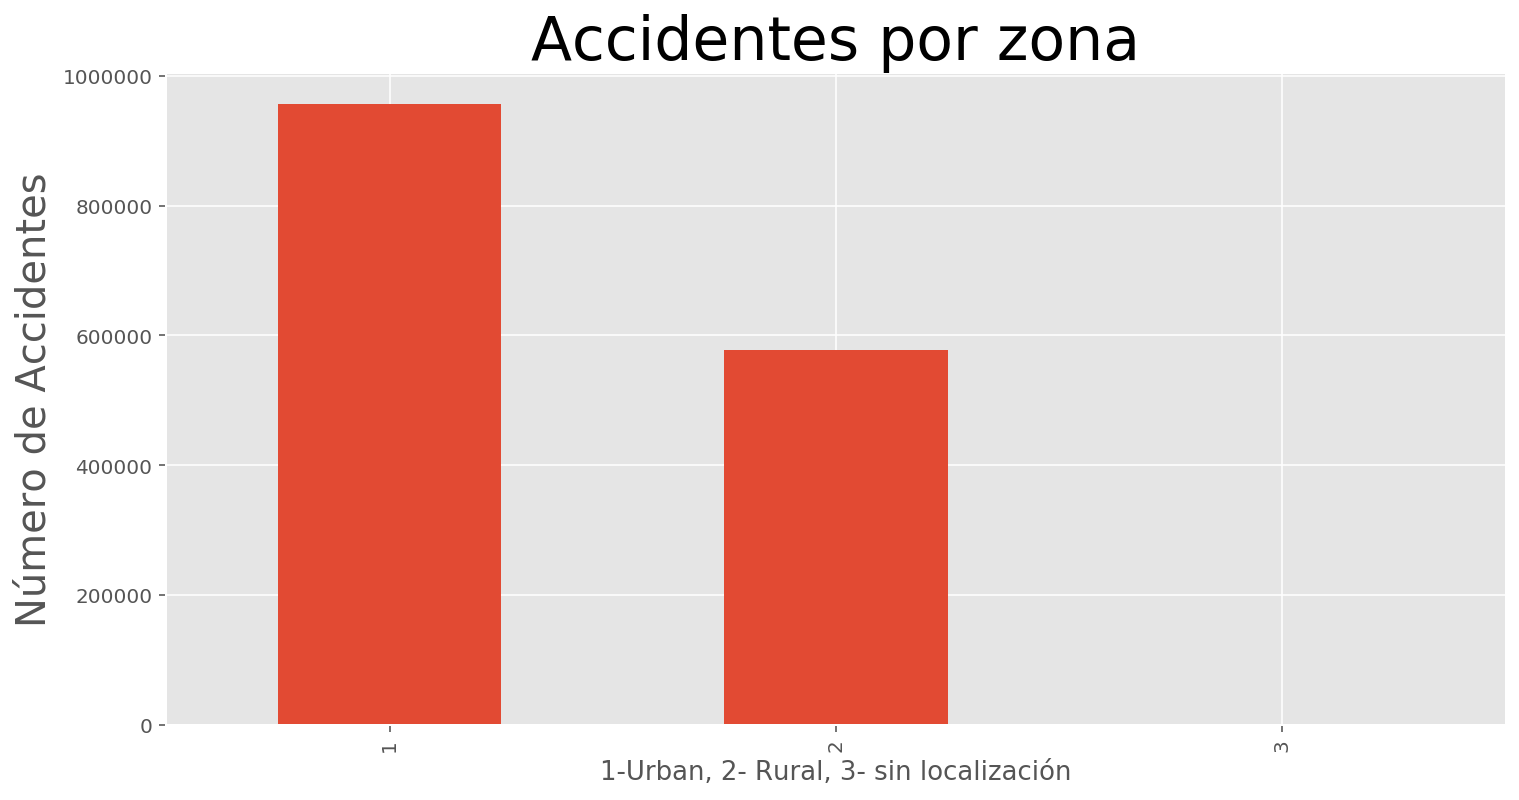

In [44]:
plt.figure(figsize=(12,6))
plt.title('Accidentes por zona' , fontsize= 30)
df_clean_miss['Urban_or_Rural_Area'].value_counts().sort_index().plot(kind='bar')#,title="Accidentes por zona")
plt.ylabel('Número de Accidentes' , fontsize = 20)
plt.xlabel( '1-Urban, 2- Rural, 3- sin localización', fontsize = 13)

Text(0.5, 0, '1-bici,  2-5 moto,  8-9 - coche,  11 - autobús,  19 - furgoneta,   21- camión > de 7,5 t')

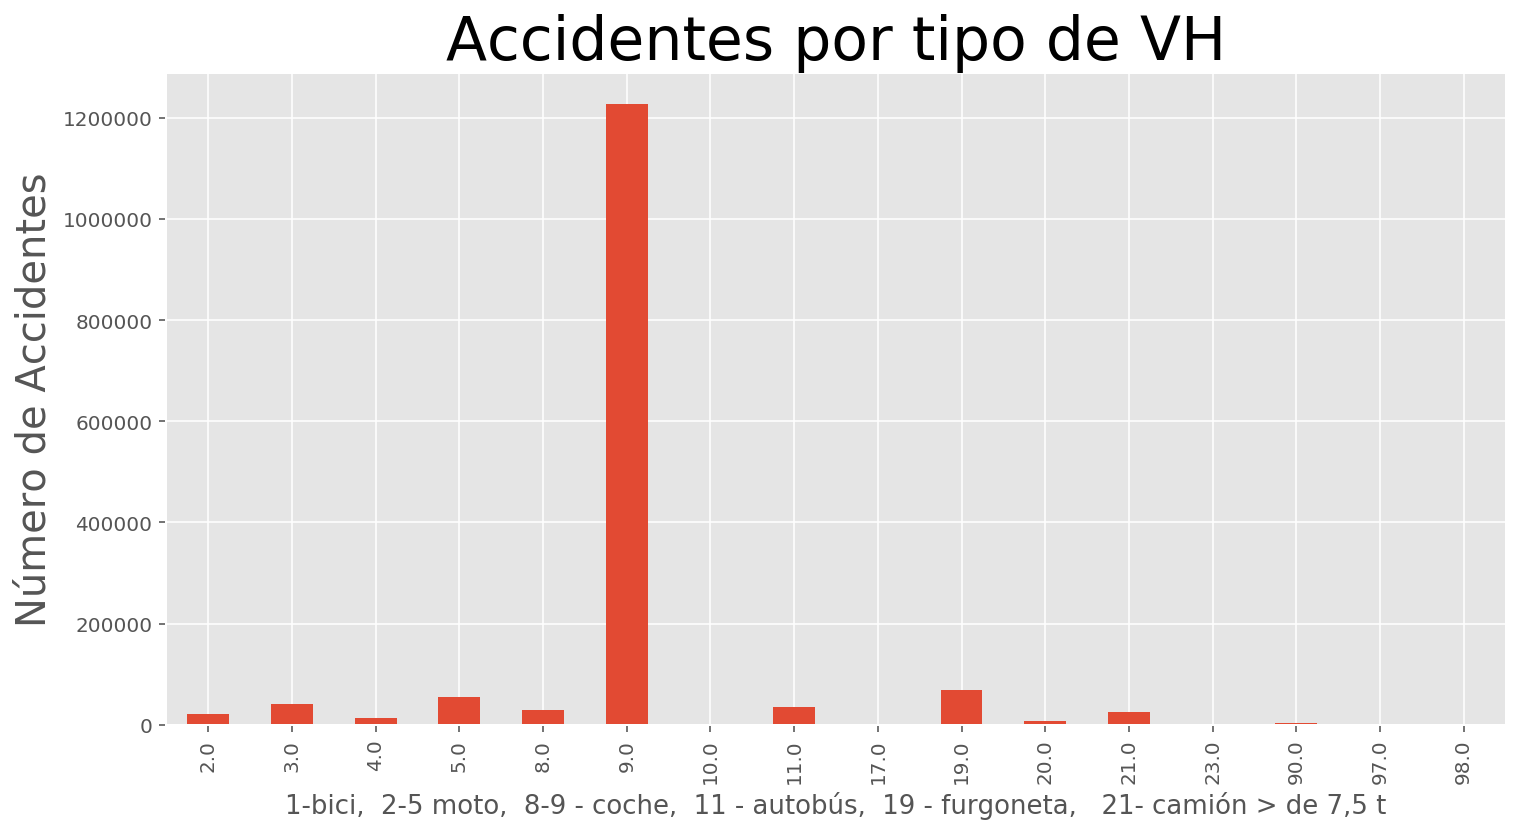

In [45]:
plt.figure(figsize=(12,6))
plt.title('Accidentes por tipo de VH' , fontsize= 30)
df_clean_miss['Vehicle_Type'].value_counts().sort_index().plot(kind='bar')#,title="Accidentes por zona")
plt.ylabel('Número de Accidentes' , fontsize = 20)
plt.xlabel( '1-bici,  2-5 moto,  8-9 - coche,  11 - autobús,  19 - furgoneta,   21- camión > de 7,5 t', fontsize = 13)



Entonces se confirma que la mayor parte de los accidentes se da en ciudad y a menos de 50 km/h. 
El pico de la semana es el viernes al que se llega en tendencia ascendente desde el lunes y cae el sábado y el domingo.
De estas visualizaciones podemos extraer, que los accidentes se producen en los desplazamientos de zona urbana en días laborables y a menos de 50 km/hora, y el tipo de vh que más accidentes tiene es el coche.

### Visualización de variable target

Exploro la variable target y esta desbalanceada hacia los casos leves. 
Unido a la visualizaciones anteriores toma consistencia todo lo expuesto, ya que la mayoría de los accidentes son a menos de 50 km/h por lo que el daño es menor que a mayor velocidad.

3    1324147
2     190328
1      20317
Name: Accident_Severity, dtype: int64


Text(0.5, 0, '1-Fatal, 2- Grave, 3- Leve')

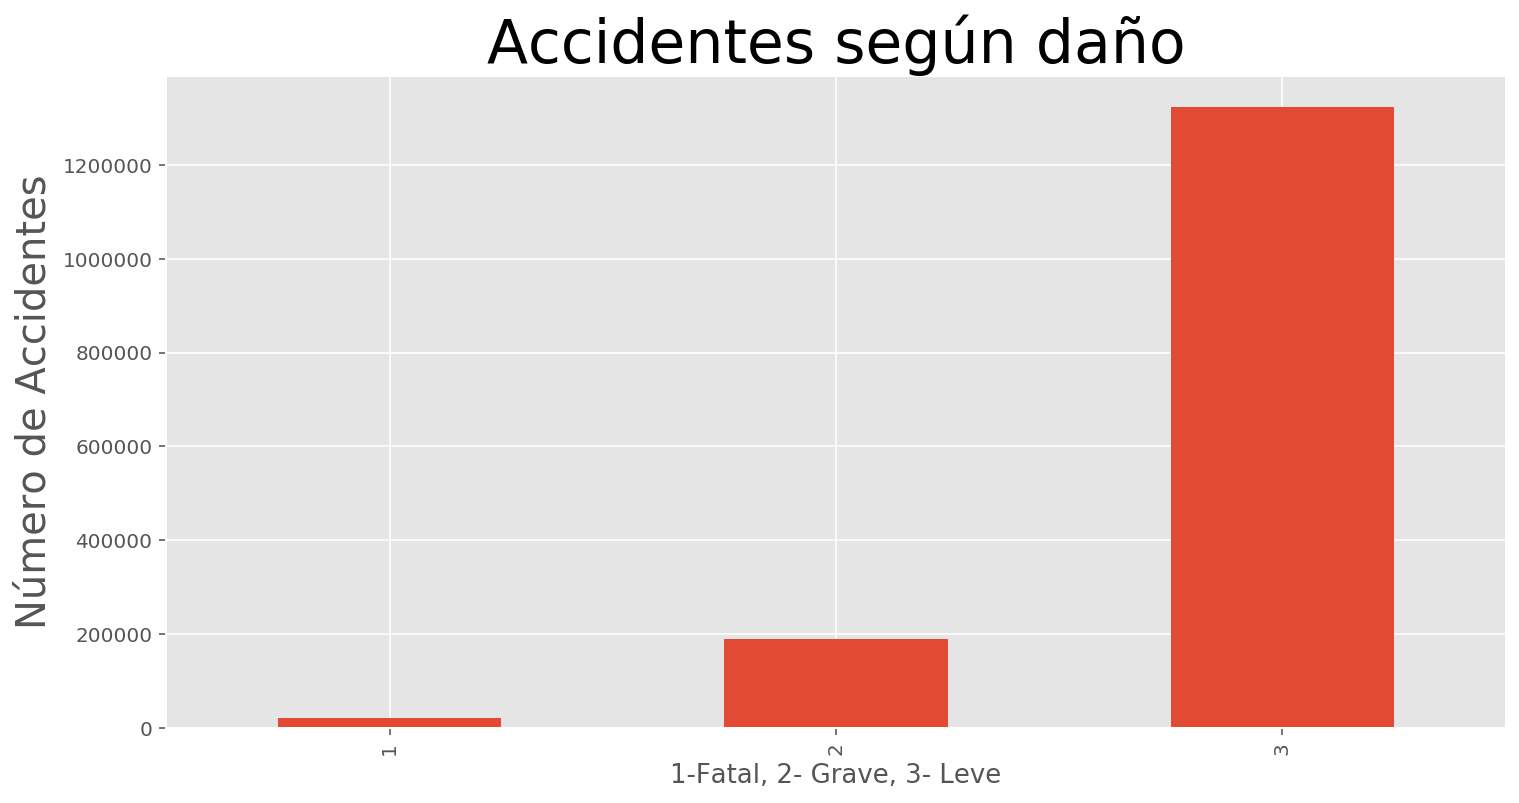

In [46]:
plt.figure(figsize=(12,6))
plt.title('Accidentes según daño' , fontsize= 30)
df_clean_miss['Accident_Severity'].value_counts().sort_index().plot(kind='bar')#,title="Number of Accidents with Each Damage Grade")
print(df_clean_miss['Accident_Severity'].value_counts())
plt.ylabel('Número de Accidentes' , fontsize = 20)
plt.xlabel( '1-Fatal, 2- Grave, 3- Leve', fontsize = 13)

##  Transformación de variables

A continuación voy a transforama dos variables, la transformación va a ser logaritmica para que sus distribuciones se aproximen a una normal. Y voy a visualizar si la transformación ha tenido el efecto deseado.

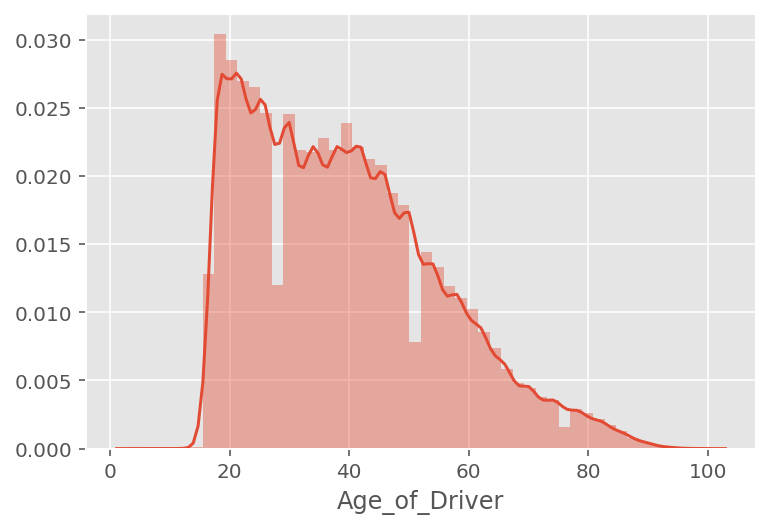

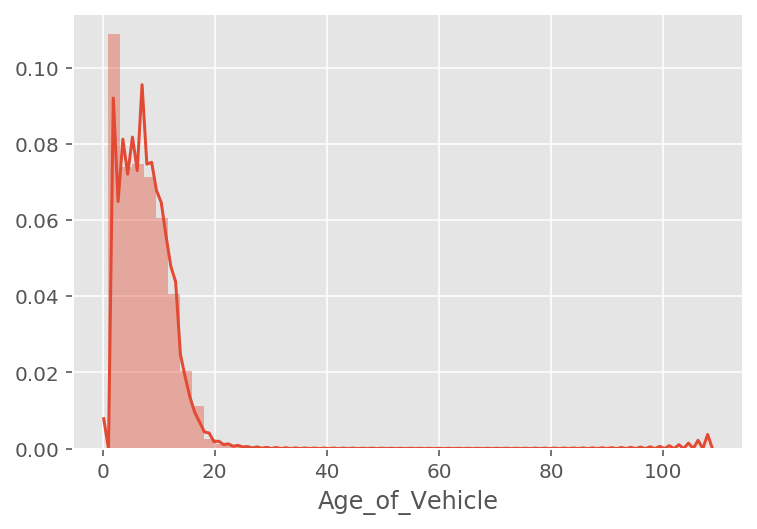

<Figure size 432x288 with 0 Axes>

In [47]:
sns.distplot(df_clean_miss['Age_of_Driver']);
fig = plt.figure()
sns.distplot(df_clean_miss['Age_of_Vehicle']);
fig = plt.figure()

Comprobación del efecto de la transformación logaritmica.

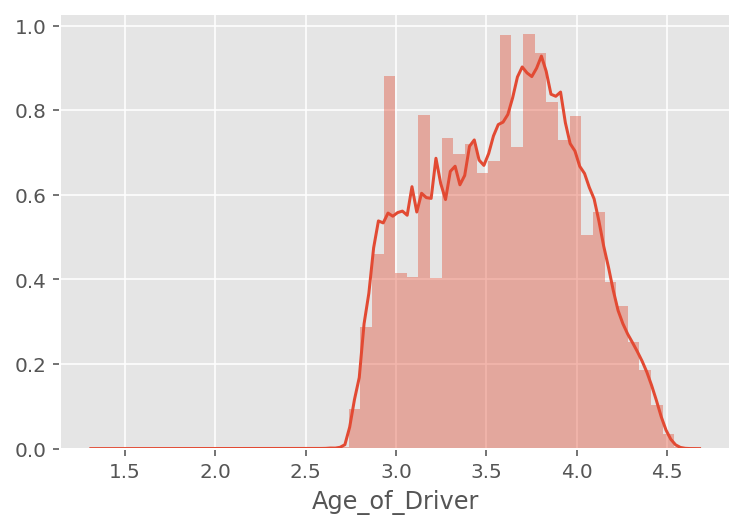

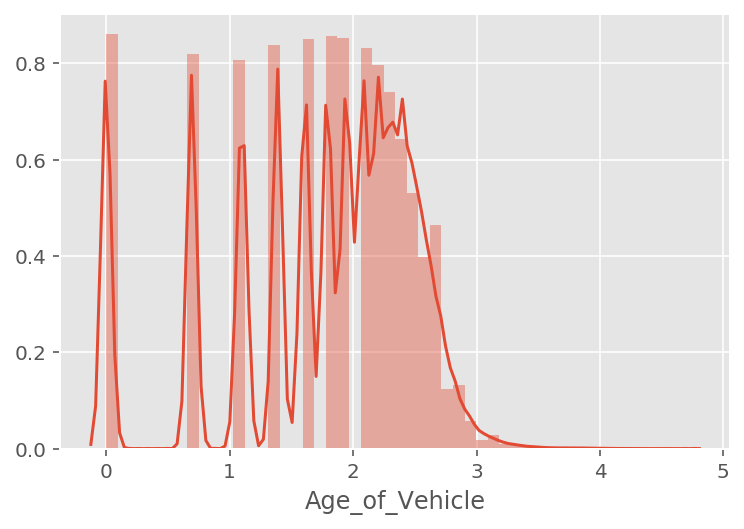

<Figure size 432x288 with 0 Axes>

In [48]:
df_clean_miss['Age_of_Driver'] =np.log(df_clean_miss['Age_of_Driver'])
df_clean_miss['Age_of_Vehicle'] =np.log(df_clean_miss['Age_of_Vehicle'])


sns.distplot(df_clean_miss['Age_of_Driver']);
fig = plt.figure()
sns.distplot(df_clean_miss['Age_of_Vehicle']);
fig = plt.figure()

## Proceso de modelado

#### Definición de la matriz "X" y el target "y"

Defino X e Y y selecciono la variables que finalmente van a entrar en el proceso de modelado. También hago la partición en train y test.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_accident = df_clean_miss.drop('Accident_Severity' ,axis=1)
X_accident = X_accident[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit','Vehicle_Manoeuvre','Vehicle_Leaving_Carriageway'
                            , 'Skidding_and_Overturning','Junction_Detail','Driver_Home_Area_Type', 'Road_Type','Journey_Purpose_of_Driver','Junction_Location'
                         ,'Hit_Object_off_Carriageway','Hit_Object_in_Carriageway','Police_Force']]


X_train, X_test, y_train, y_test = train_test_split(X_accident.values, 
                                              df_clean_miss['Accident_Severity'].values,test_size=0.30, random_state=99)

In [50]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1074354, 22), (460438, 22), (1074354,), (460438,))

#### Clasificador Dummy (baseline)

Me defino un modelo totalmente aleatorio, elige siempre la clase mayoritaria para poder batirlo con el resto de modelos.
El problema que veo es, que está desbalanceado el dataset y se refleja en el scorring que partimos de un 0.8624440206933398.

In [51]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_train,y_train)

print("Scoring training:", clf_dummy.score(X_train, y_train))
print("Scoring test    :", clf_dummy.score(X_test, y_test))

Scoring training: 0.8628859761307726
Scoring test    : 0.8624440206933398


In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics         import confusion_matrix

y_preddu=clf_dummy.predict(X_test)

print(classification_report(y_test, y_preddu))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_preddu),
    columns=['pred_1', 'pred_2','pred_3'],
    index  =['1 fatal', '2 grave','3 leve']
)
print(conf)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6134
           2       0.00      0.00      0.00     57202
           3       0.86      1.00      0.93    397102

    accuracy                           0.86    460438
   macro avg       0.29      0.33      0.31    460438
weighted avg       0.74      0.86      0.80    460438

         pred_1  pred_2  pred_3
1 fatal       0       0    6134
2 grave       0       0   57202
3 leve        0       0  397102


#### Estandarización de las variables

Aplicaremos estandarízación para los modelos que se vean afectados por variables no estandarizadas

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_train)
X_te_sc = scaler.transform(X_test)

#### Decision tree

In [54]:

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=9, random_state=123, min_samples_leaf=3,min_samples_split=3)
tree.fit(X_train, y_train)

tree.fit(X_train, y_train)
print("Scoring training:", tree.score(X_train, y_train))
print("Scoring test    :", tree.score(X_test, y_test))

Scoring training: 0.8642225932979261
Scoring test    : 0.8630543091578019


<!-- ?DecisionTreeClassifier


tuned_parameters={'min_samples_split': [2,5],
                  'min_samples_leaf': [2,3],
                  'max_depth'   : [7,10,11]}
                  
                  
                  Scoring training: 0.864088559264451
Scoring test    : 0.8629891538057242


DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
) -->

In [55]:

y_predtr=tree.predict(X_test)

print(classification_report(y_test, y_predtr))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_predtr),
    columns=['pred_1', 'pred_2','pred_3'],
    index  =['1 fatal', '2 grave','3 leve']
)
print(conf)

              precision    recall  f1-score   support

           1       0.21      0.00      0.00      6134
           2       0.48      0.04      0.07     57202
           3       0.87      1.00      0.93    397102

    accuracy                           0.86    460438
   macro avg       0.52      0.35      0.33    460438
weighted avg       0.81      0.86      0.81    460438

         pred_1  pred_2  pred_3
1 fatal      10     497    5627
2 grave      15    2254   54933
3 leve       22    1961  395119


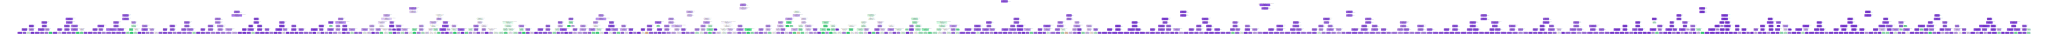

In [56]:
#visualización del decision tree
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(tree,out_file=None,feature_names= X_accident.columns,
                       class_names=['fatal', 'grave', 'leve'],  
                       filled=True, rounded=True,  
                       #max_depth=9,
                       special_characters=True)
graph = graphviz.Source(data)
graph

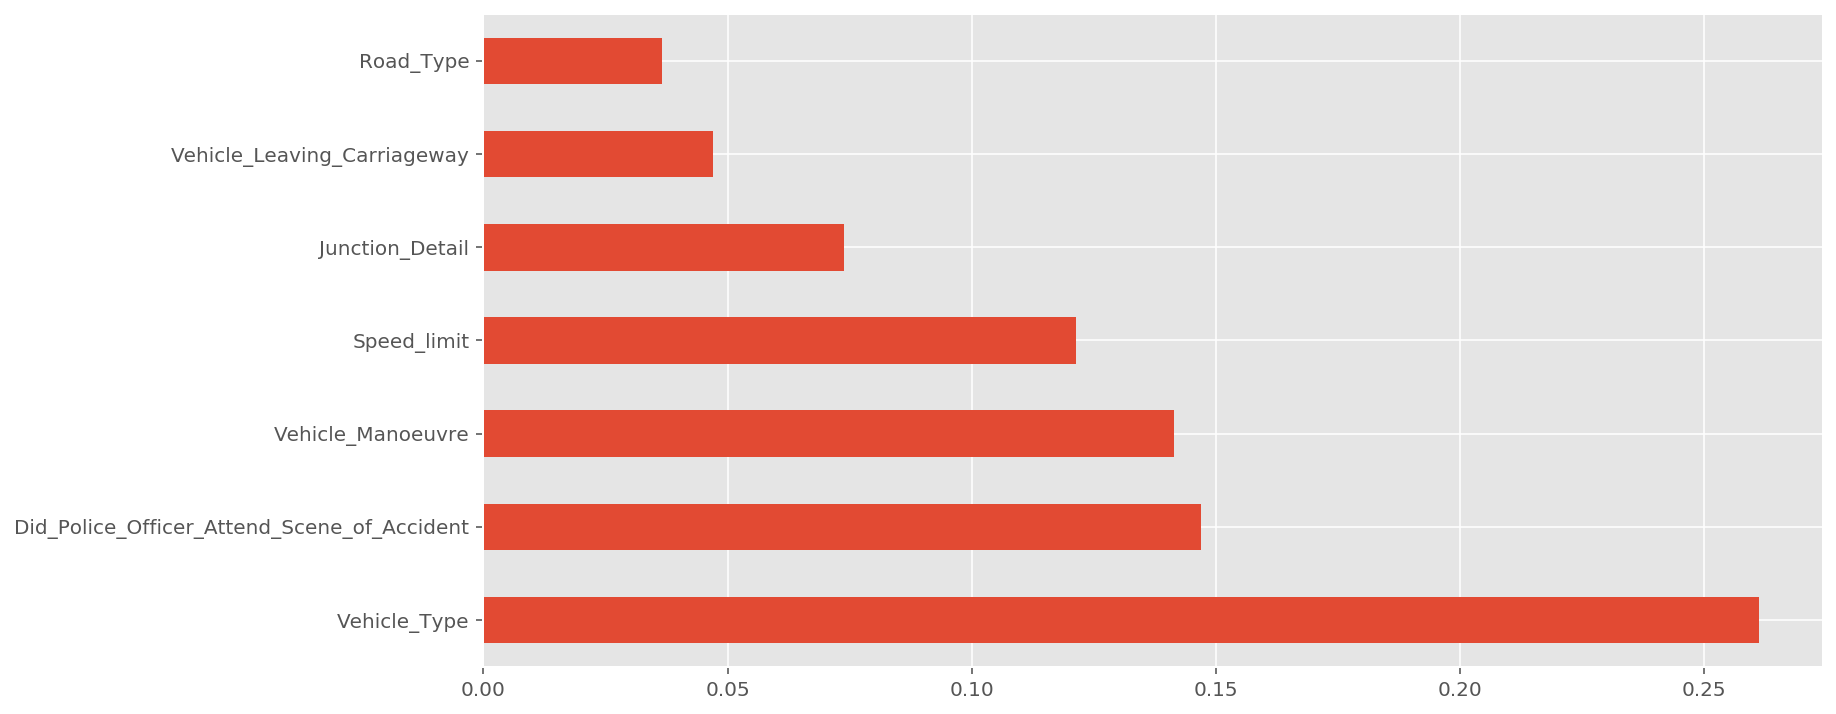

In [57]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(tree.feature_importances_, index=X_accident.columns)
feat_importances.nlargest(7).plot(kind='barh')

#### Regresión logística

In [58]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(solver='newton-cg',C=1)
clf_lr.fit(X_tr_sc, y_train)

print("Scoring training:", clf_lr.score(X_tr_sc, y_train))
print("Scoring test    :", clf_lr.score(X_te_sc, y_test))

Scoring training: 0.8628720142522855
Scoring test    : 0.8624396770032013


In [59]:
y_predtr=clf_lr.predict(X_te_sc)

print(classification_report(y_test, y_predtr))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_predtr),
    columns=['pred_1', 'pred_2','pred_3'],
    index  =['1 fatal', '2 grave','3 leve']
)
print(conf)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6134
           2       0.00      0.00      0.00     57202
           3       0.86      1.00      0.93    397102

    accuracy                           0.86    460438
   macro avg       0.29      0.33      0.31    460438
weighted avg       0.74      0.86      0.80    460438

         pred_1  pred_2  pred_3
1 fatal       0       0    6134
2 grave       1       0   57201
3 leve        2       0  397100


#### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

random_f = RandomForestClassifier(n_estimators=301, random_state=0, max_features=None, n_jobs=-1, max_depth=9,
                                  min_samples_leaf=3,min_samples_split=3)

random_f.fit(X_train, y_train)
print("Scoring training:", random_f.score(X_train, y_train))
print("Scoring test    :", random_f.score(X_test, y_test))

Scoring training: 0.864617249063158
Scoring test    : 0.8634691315660306


In [61]:
y_predr=random_f.predict(X_test)

print(classification_report(y_test, y_predr))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_predr),
    columns=['pred_1', 'pred_2','pred_3'],
    index  =['1 fatal', '2 grave','3 leve']
)
print(conf)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6134
           2       0.50      0.04      0.07     57202
           3       0.87      1.00      0.93    397102

    accuracy                           0.86    460438
   macro avg       0.46      0.34      0.33    460438
weighted avg       0.81      0.86      0.81    460438

         pred_1  pred_2  pred_3
1 fatal       0     481    5653
2 grave       0    2069   55133
3 leve        0    1597  395505


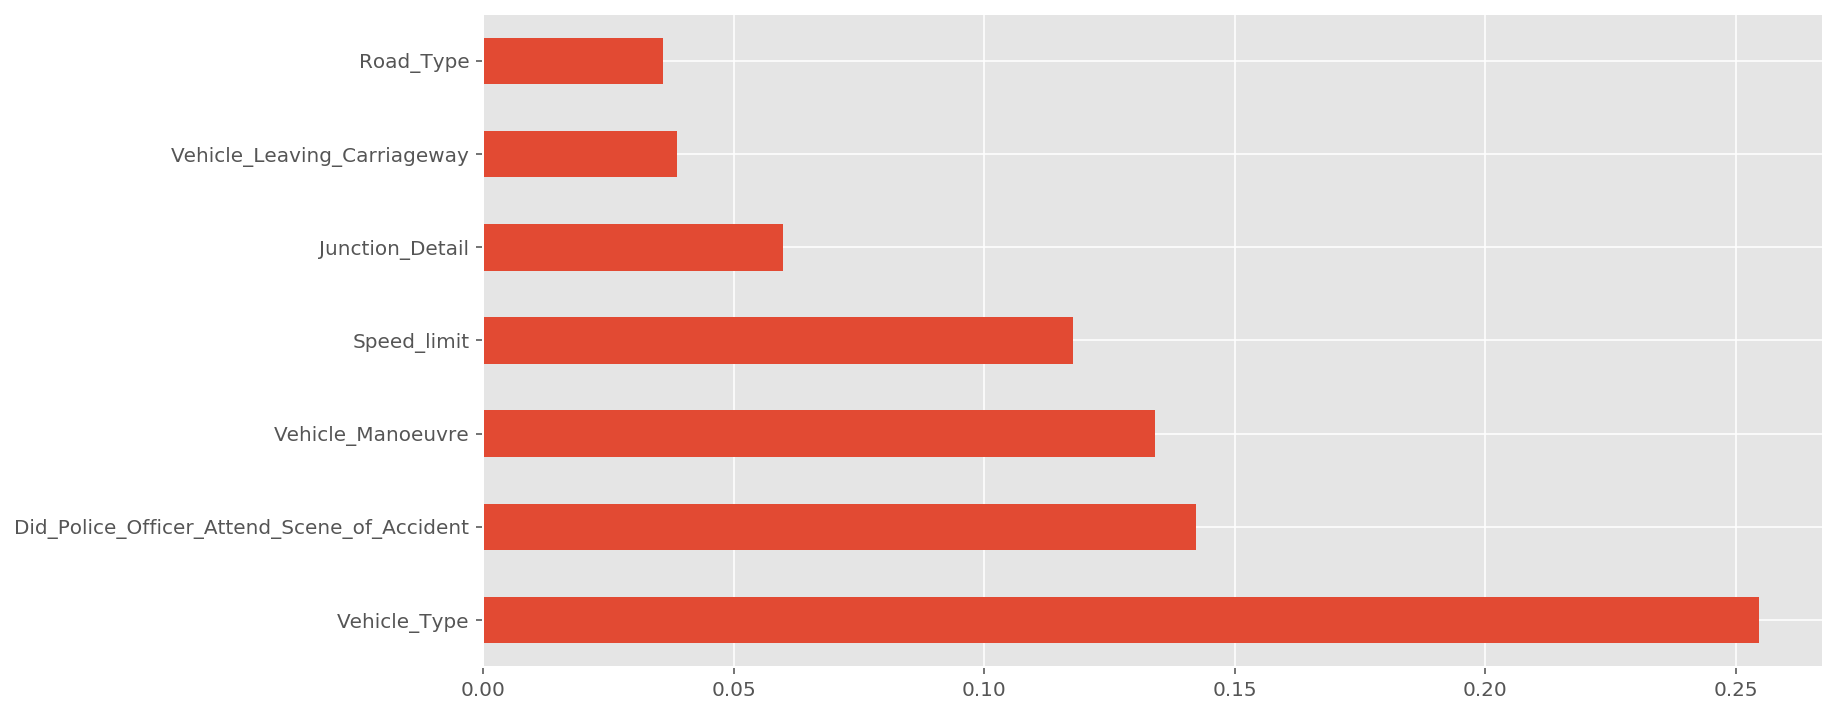

In [62]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_f.feature_importances_, index=X_accident.columns)
feat_importances.nlargest(7).plot(kind='barh')

## Conclusión

He probado distintos modelos para poder batir el baseline, siendo bastante complicado ya que el dataset está desbalanceado, para mejorar el scoring se pueden utilizar las siguientes técnicas:

-  Muestro: 
    - Sobremuestreo de la clase minoritaria: consiste en añadir copias de la clase minoritaria para aumentar su peso sobre el         total.
    - submuestreo de la clase mayoritaria:se basa en quitar muestra de la clase mayoritaria para intentar equilibrar el número       de muestras en cada clase.
    - Generación de muestras sintéticas: utilizando algoritmos como el SMOTE, somos capaces de generar más muestras de la clase       minoritaria a partir de las que ya tenemos.
    
-  Pasar el target a dos clases, sumando (1) Fatal+ (2) Grave, ya que la clase uno no consigue diferenciarla bien.

El modelo Random Forest es el que mejor ha funcionado, mejorando el scoring test del baseline 0.8624440 vs al scoring test de RForest 0.863469 además de la mejora en la métrica de precisión.

Poniendo en relación las visualizaciones anteriores con la importancia que dan a las variables, DecisionTree como RandomForest, se consolidad que:

- El tipo de vh es de las primeras variables que determina las divisiones, en la visualización se veía que la gran mayoría de accidentes eran para ese colectivo.
- Acudió a la escena la policía, es la segunda en importancia, tiene lógica porque la policía suele acudir si los accidentes son más graves.
- Maniobra del vh, esto es así debido a que los accidentes son en zonas urbanas y a menos de 50 km/h por lo que se entiende que son maniobras de giros, paradas por semáforos, etc. Mientras que en carretera la maniobra principal viene de adelantamientos y son accidentes más graves.
- Límite de velocidad, comentado en la visualización accidentes leves a menos velocidad.
......


